In [293]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from plotly import graph_objects as go


df = pd.read_csv("survey_results_public.csv")
pd.set_option('display.max_row', 500)
pd.set_option('display.float_format', '{:.2f}'.format)
'''

df = df.drop(columns=['ResponseId','CodingActivities','Employment','OrgSize','TechList','PurchaseInfluence','BuyNewTool','PlatformHaveWorkedWith','PlatformWantToWorkWith','Q120','DatabaseHaveWorkedWith','DatabaseWantToWorkWith','WebframeHaveWorkedWith','WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith',
       'OpSysPersonal use', 'OpSysProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith','NEWSOSites',
       'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm', 'SOAI', 'AISelect',
       'AISent', 'AIAcc', 'AIBen'],axis=1)
'''
''' Não uteis
    CodingActivities
    Employment
    OrgSize
    TechList
    PurchaseInfluence
    BuyNewTool
    Currency
'''
''' Kinda
    LearnCode
    LearnCodeOnline
    LearnCodeCoursesCert
    YearsCode
    DevType
    LanguageHaveWorkedWith
    AISearchHaveWorkedWith
    WorkExp
    TimeAnswering
'''
''' Uteis
    EdLevel
    RemoteWork
    Country
    ConvertedCompYearly
'''
df


,Unnamed: 0,MainBranch,Age,RemoteWork,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,0,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,I am a developer by profession,25-34 years old,Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.00
2,2,I am a developer by profession,45-54 years old,"Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.00
3,3,I am a developer by profession,25-34 years old,"Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,NaN,12,7,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.00
4,4,I am a developer by profession,25-34 years old,Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,Other;Codecademy;edX,6,4,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89179,89179,I am a developer by profession,25-34 years old,Remote,"Associate degree (A.A., A.S., etc.)",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,Udemy,20,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN
89180,89180,I am a developer by profession,18-24 years old,"Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Online Courses or Certification;Othe...,Formal documentation provided by the owner of ...,NaN,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
89181,89181,I code primarily as a hobby,Prefer not to say,NaN,Something else,Books / Physical media;Hackathons (virtual or ...,NaN,Codecademy;Coursera,10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN
89182,89182,I am a developer by profession,Under 18 years old,"Hybrid (some remote, some in-person)","Secondary school (e.g. American high school, G...",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,Udemy,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN


In [105]:
test = df.LanguageWantToWorkWith.dropna()
array = []
for val in test:
    temp = val.split(";")
    for item in temp:
        array.append(item)
dfLTWW = pd.DataFrame(array)
dfLTWW.value_counts(normalize=True).round(4)*100

test2 = df.LanguageHaveWorkedWith.dropna()
array2 = []
for val in test2:
    temp = val.split(";")
    for item in temp:
        array2.append(item)



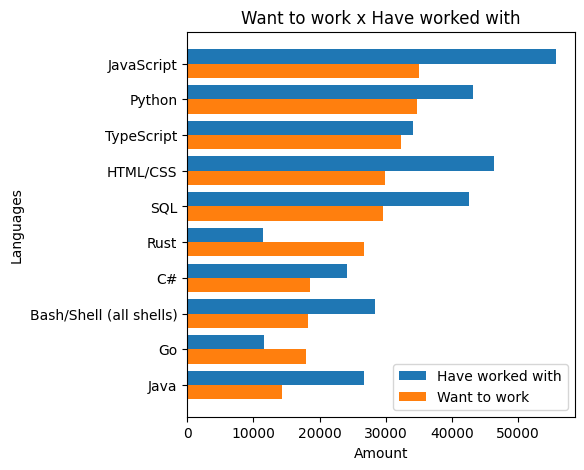

In [106]:
dffinal = pd.DataFrame(pd.DataFrame(array).value_counts())
dfmerge = pd.DataFrame(pd.DataFrame(array2).value_counts())
dfmerge.reset_index(inplace=True)                       
dffinal.reset_index(inplace=True)
dffinal = dffinal.rename(columns = {0:'Items'})
dfmerge = dfmerge.rename(columns = {0:'Items'})

result = pd.merge(dffinal, dfmerge, on='Items', how='inner')
result = result.head(10)

X = result.Items
Ygirls = result.count_x	
Zboys = result.count_y

X_axis = np.arange(len(X))[::-1]

plt.figure(figsize=[5,5])

plt.barh(X_axis + 0.2, Zboys, 0.4, label = 'Have worked with') 
plt.barh(X_axis - 0.2, Ygirls, 0.4, label = 'Want to work') 


plt.yticks(X_axis, X) 
plt.xlabel("Amount") 
plt.ylabel("Languages") 
plt.title("Want to work x Have worked with") 
plt.legend()
plt.show()

<Figure size 1600x800 with 0 Axes>

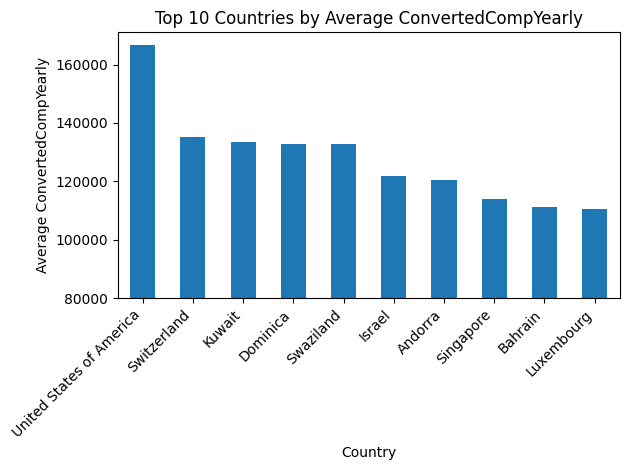

In [231]:
ConvertedCompYearly = df[['Country','ConvertedCompYearly']].dropna()
ConvertedCompYearly = ConvertedCompYearly[(ConvertedCompYearly['ConvertedCompYearly'] > 13000.00) & (ConvertedCompYearly['ConvertedCompYearly'] < 1000000.00)]

ConvertedCompYearly = ConvertedCompYearly.groupby("Country")
ConvertedCompYearly = ConvertedCompYearly.mean()
ConvertedCompYearly = ConvertedCompYearly.sort_values(by='ConvertedCompYearly')[::-1]
ConvertedCompYearly['ConvertedCompYearly'] = ConvertedCompYearly['ConvertedCompYearly'] - 80000


plt.figure(figsize=(16, 8))
ConvertedCompYearly.head(10).plot(kind='bar', legend=False, bottom=80000)
plt.xlabel('Country')
plt.ylabel('Average ConvertedCompYearly')
plt.title('Top 10 Countries by Average ConvertedCompYearly')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [346]:
RemoteWork = df[['RemoteWork', 'ConvertedCompYearly']].dropna()
RemoteWork = RemoteWork[(RemoteWork['ConvertedCompYearly'] > 1000.00) & (RemoteWork['ConvertedCompYearly'] < 1000000.00)]
RemoteWork.replace('Hybrid (some remote, some in-person)','Hybrid',inplace=True)
RemoteWork = RemoteWork.groupby("RemoteWork")
RemoteWork = RemoteWork.mean()
RemoteWork = RemoteWork.sort_values(by='ConvertedCompYearly')[::-1]
RemoteWork = RemoteWork.reset_index()


fig = go.Figure(go.Funnelarea(
    labels = RemoteWork.RemoteWork,
    values  = RemoteWork.ConvertedCompYearly,
    textinfo = "value",
    textfont_size=20,
    texttemplate="%{value:$,.2s}",
    textfont=dict(color='ivory')))

fig.update_layout(
    height=400,  
    width=600,
    font=dict(color='black')
)
fig.show()

In [351]:
EdLevel = df[['EdLevel',"ConvertedCompYearly"]].dropna()
EdLevel = EdLevel[(EdLevel['ConvertedCompYearly'] > 1000.00) & (EdLevel['ConvertedCompYearly'] < 1000000.00)]
EdLevel = EdLevel.groupby('EdLevel')
EdLevel = EdLevel.mean()
EdLevel = EdLevel.sort_values(by='ConvertedCompYearly')[::-1]
EdLevel = EdLevel.reset_index()
EdLevel

,EdLevel,ConvertedCompYearly
0,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",104634.58
1,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",97412.67
2,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",94908.69
3,Some college/university study without earning ...,87939.44
4,Primary/elementary school,87201.00
5,"Associate degree (A.A., A.S., etc.)",87060.63
6,"Secondary school (e.g. American high school, G...",71509.27
7,Something else,68410.27


In [110]:
DevType = df[['DevType','ConvertedCompYearly']].dropna()
DevType = DevType[(DevType['ConvertedCompYearly'] > 1000.00) & (DevType['ConvertedCompYearly'] < 1000000.00)]
DevType = DevType.groupby('DevType')
DevType = DevType.mean()
DevType = DevType.sort_values(by='ConvertedCompYearly')[::-1]
DevType.drop('Other (please specify):',inplace=True)
DevType

,ConvertedCompYearly
DevType,
"Senior Executive (C-Suite, VP, etc.)",152815.17
Engineering manager,139279.67
Developer Experience,137462.70
"Engineer, site reliability",136991.31
Cloud infrastructure engineer,128499.06
Marketing or sales professional,128233.05
Developer Advocate,127967.26
Security professional,127136.11
Product manager,124339.57


C:\Users\Leo\AppData\Local\Temp\ipykernel_15060\1444840282.py:15: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



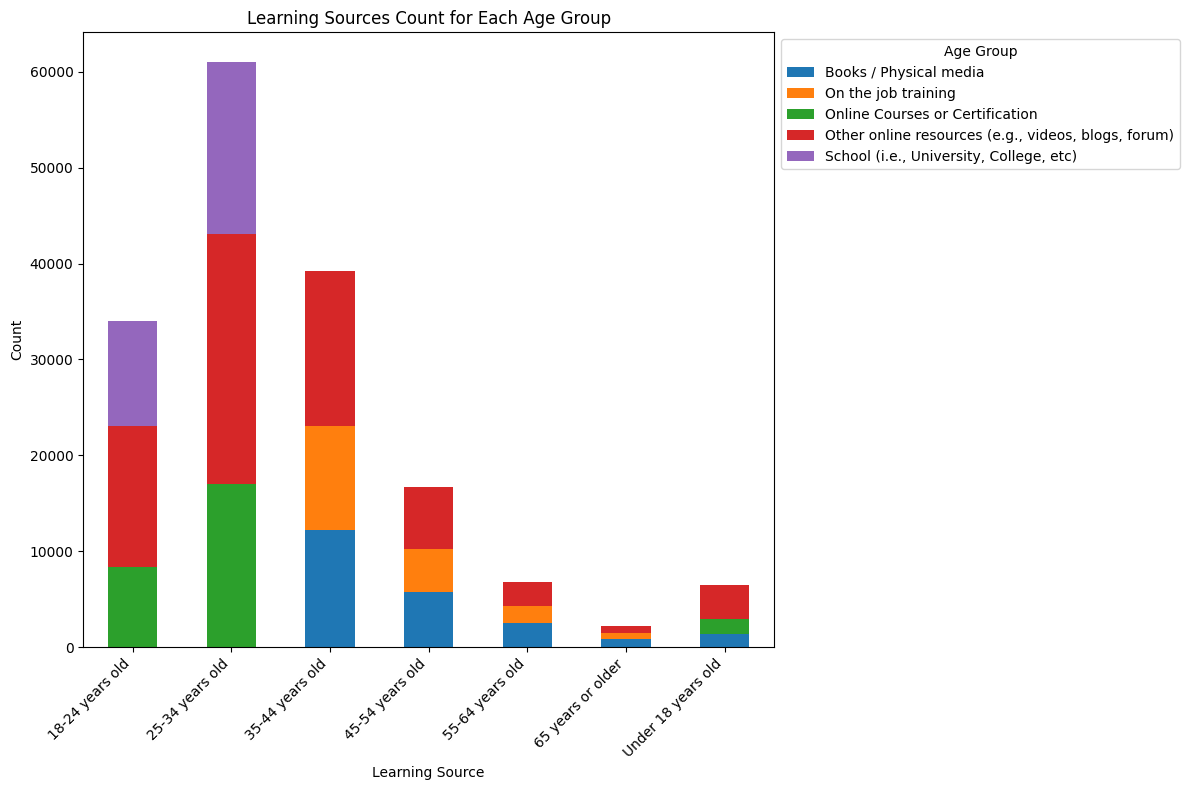

In [350]:
LearnCode = df[['Age','LearnCode']].dropna()
LearnCode = LearnCode[LearnCode['Age'] != 'Prefer not to say']

array = []

for num, val in enumerate(LearnCode['LearnCode']):
    split = val.split(';')
    for item in split:
        array.append([LearnCode['Age'].iloc[num], item])
    

LearnCode = pd.DataFrame(array,columns=['Age', 'Learning Source'])

counts = LearnCode.groupby(['Age', 'Learning Source']).size().reset_index(name='Count')
top3_per_age = counts.groupby('Age').apply(lambda group: group.nlargest(3, 'Count')).reset_index(drop=True)
top3_per_age

pivot_table = top3_per_age.pivot(index='Age', columns='Learning Source', values='Count').fillna(0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Plot each learning source as a stacked bar
pivot_table.plot(kind='bar', stacked=True, ax=ax)

ax.set_xlabel('Learning Source')
ax.set_ylabel('Count')
ax.set_title('Learning Sources Count for Each Age Group')

plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()